## Carregamento dos dados

* **Foi ser necessário carregar por fases, visto que são muitos dados**

In [1]:
import pandas as pd

### Função que verifica a existencia de valores nulos e conta-os por coluna. Para além disso junta as linhas completas

In [2]:
def processa_chunk(ms, valores, ds):
    if(valores is None): valores = ms.isnull().sum()
    else: valores += ms.isnull().sum()
        
    if(ds is None): ds = ms.dropna()
    else: ds = pd.concat([ds,ms.dropna()],ignore_index=True)
    print('feito')
    return (valores, ds)

In [3]:
chunksize = 0.5 * (10 ** 6)
nlinhas = 0
valores = None
ds = None
'''for ms in pd.read_csv('../train.csv', low_memory=False, chunksize = chunksize):
    nlinhas += ms.shape[0]
    (valores, ds) = processa_chunk(ms, valores, ds)
'''
ms = pd.read_csv('../../sample_train.csv', low_memory=False)
(valores, ds) = processa_chunk(ms, valores, ds)

feito


In [4]:
nlinhas = ms.shape[0]
nlinhas

600000

#### Transforma o número de valores nulos em percentagem

In [5]:
print(valores)
percentagem = valores / nlinhas

MachineIdentifier                               0
ProductName                                     0
EngineVersion                                   0
AppVersion                                      0
AvSigVersion                                    0
IsBeta                                          0
RtpStateBitfield                             2169
IsSxsPassiveMode                                0
DefaultBrowsersIdentifier                  570894
AVProductStatesIdentifier                    2403
AVProductsInstalled                          2403
AVProductsEnabled                            2403
HasTpm                                          0
CountryIdentifier                               0
CityIdentifier                              21668
OrganizationIdentifier                     185073
GeoNameIdentifier                              15
LocaleEnglishNameIdentifier                     0
Platform                                        0
Processor                                       0


#### Remove as que têm 0 valores nulos

In [6]:
type(percentagem)
percentagem = percentagem[percentagem != 0]

#### Divide as colunas em percentagem de valores nulos:

- 0% a 25%: baixa
- 25% a 50%: média baixa
- 50% a 75%: média alta
- 75% a 100%: alta

In [7]:
alta = percentagem[percentagem >= 0.75]
mediaAlta = percentagem[(percentagem >= 0.5) & (percentagem < 0.75)]
mediaBaixa = percentagem[(percentagem >= 0.25) & (percentagem < 0.5)]
baixa = percentagem[percentagem < 0.25]

In [8]:
alta

DefaultBrowsersIdentifier     0.951490
PuaMode                       0.999772
Census_ProcessorClass         0.995868
Census_IsFlightingInternal    0.830583
dtype: float64

In [9]:
mediaAlta

Census_InternalBatteryType    0.710528
Census_ThresholdOptIn         0.635395
Census_IsWIMBootEnabled       0.634527
dtype: float64

In [10]:
mediaBaixa

OrganizationIdentifier    0.308455
SmartScreen               0.356113
dtype: float64

In [11]:
baixa

RtpStateBitfield                                     0.003615
AVProductStatesIdentifier                            0.004005
AVProductsInstalled                                  0.004005
AVProductsEnabled                                    0.004005
CityIdentifier                                       0.036113
GeoNameIdentifier                                    0.000025
OsBuildLab                                           0.000003
IsProtected                                          0.003975
SMode                                                0.060155
IeVerIdentifier                                      0.006642
Firewall                                             0.010312
UacLuaenable                                         0.001175
Census_OEMNameIdentifier                             0.010677
Census_OEMModelIdentifier                            0.011478
Census_ProcessorCoreCount                            0.004822
Census_ProcessorManufacturerIdentifier               0.004822
Census_P

### Verifica quantas linhas completas existem no dataset

In [12]:
ds

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections


In [13]:
ms[ms['HasDetections']  == 0].shape

(299923, 83)

In [14]:
ms[ms['HasDetections']  == 1].shape

(300077, 83)

In [15]:
msN = ms[['AVProductsInstalled',
'AVProductsEnabled',
'Census_ProcessorCoreCount',
'Census_PrimaryDiskTotalCapacity',
'Census_SystemVolumeTotalCapacity',
'Census_TotalPhysicalRAM',
'Census_InternalPrimaryDiagonalDisplaySizeInInches',
'Census_InternalPrimaryDisplayResolutionHorizontal',
'Census_InternalPrimaryDisplayResolutionVertical',
'Census_InternalBatteryNumberOfCharges']]

In [16]:
print(msN.shape)
import seaborn as sns
import numpy as np
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(msN.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(msN.corr(), cmap=cmap, mask=mask)

(600000, 10)


In [17]:
ms = ms.drop(columns = ['MachineIdentifier','AVProductsInstalled',
'AVProductsEnabled',
'Census_ProcessorCoreCount',
'Census_PrimaryDiskTotalCapacity',
'Census_SystemVolumeTotalCapacity',
'Census_TotalPhysicalRAM',
'Census_InternalPrimaryDiagonalDisplaySizeInInches',
'Census_InternalPrimaryDisplayResolutionHorizontal',
'Census_InternalPrimaryDisplayResolutionVertical',
'Census_InternalBatteryNumberOfCharges',
'PuaMode',
'DefaultBrowsersIdentifier',
'Census_ProcessorClass',
'CountryIdentifier',
'CityIdentifier',
'OrganizationIdentifier',
'GeoNameIdentifier',
'LocaleEnglishNameIdentifier',
'AVProductStatesIdentifier',
'Census_OEMNameIdentifier',
'Census_OEMModelIdentifier',
'Census_ProcessorModelIdentifier',
'Census_FirmwareVersionIdentifier',
'Census_FirmwareManufacturerIdentifier',
'IeVerIdentifier',
'Census_OSBuildNumber',
'Census_OSBuildRevision',
'Census_OSUILocaleIdentifier',
'OsBuildLab'], errors='ignore')

In [18]:
len(['MachineIdentifier','AVProductsInstalled',
'AVProductsEnabled',
'Census_ProcessorCoreCount',
'Census_PrimaryDiskTotalCapacity',
'Census_SystemVolumeTotalCapacity',
'Census_TotalPhysicalRAM',
'Census_InternalPrimaryDiagonalDisplaySizeInInches',
'Census_InternalPrimaryDisplayResolutionHorizontal',
'Census_InternalPrimaryDisplayResolutionVertical',
'Census_InternalBatteryNumberOfCharges',
'PuaMode',
'DefaultBrowsersIdentifier',
'Census_ProcessorClass',
'CountryIdentifier',
'CityIdentifier',
'OrganizationIdentifier',
'GeoNameIdentifier',
'LocaleEnglishNameIdentifier',
'AVProductStatesIdentifier',
'Census_OEMNameIdentifier',
'Census_OEMModelIdentifier',
'Census_ProcessorModelIdentifier',
'Census_FirmwareVersionIdentifier',
'Census_FirmwareManufacturerIdentifier',
'IeVerIdentifier',
'Census_OSBuildNumber',
'Census_OSBuildRevision',
'Census_OSUILocaleIdentifier',
'OsBuildLab'])

30

In [19]:
ms.nunique()

ProductName                                   4
EngineVersion                                53
AppVersion                                   97
AvSigVersion                               6713
IsBeta                                        2
RtpStateBitfield                              7
IsSxsPassiveMode                              2
HasTpm                                        2
Platform                                      4
Processor                                     3
OsVer                                        23
OsBuild                                      49
OsSuite                                      11
OsPlatformSubRelease                          9
SkuEdition                                    8
IsProtected                                   2
AutoSampleOptIn                               2
SMode                                         2
SmartScreen                                  13
Firewall                                      2
UacLuaenable                            

In [20]:
#ms['AvSigVersion'].apply(lambda x: trataString(x)).unique().size

In [21]:
ms.nunique().sum() - 6713 - 97 + 38 + 15 + 12

845

In [22]:
mt = ms.drop(columns = ['AvSigVersion'])

In [23]:
mt.nunique()

ProductName                                  4
EngineVersion                               53
AppVersion                                  97
IsBeta                                       2
RtpStateBitfield                             7
IsSxsPassiveMode                             2
HasTpm                                       2
Platform                                     4
Processor                                    3
OsVer                                       23
OsBuild                                     49
OsSuite                                     11
OsPlatformSubRelease                         9
SkuEdition                                   8
IsProtected                                  2
AutoSampleOptIn                              2
SMode                                        2
SmartScreen                                 13
Firewall                                     2
UacLuaenable                                 7
Census_MDC2FormFactor                       12
Census_Device

In [24]:
import scipy.stats as ss
import numpy as np
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [26]:
aux = np.zeros([mt.columns.size,mt.columns.size])
cvD = pd.DataFrame(aux,index=mt.columns,columns=mt.columns)
for var in mt.columns:
    for var2 in mt.columns:
        cvD[var][var2] = cramers_v(mt[var],mt[var2])

/home/jose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


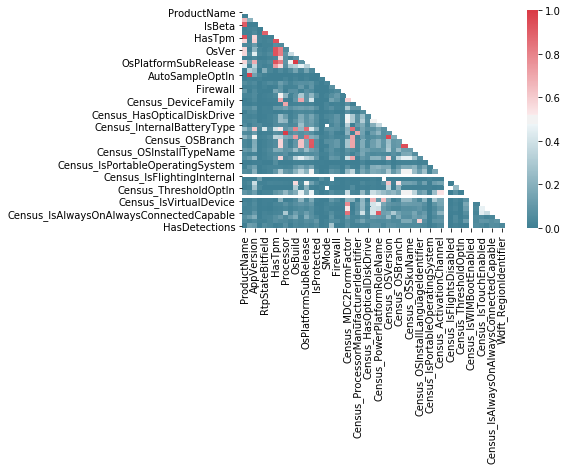

In [27]:
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(cvD, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cvD, cmap=cmap, mask=mask)
plt.savefig('sample.png')

In [28]:
sl = mt.columns.size
dic = {}
for i in range(0,sl):
    for j in range(i+1,sl):
        if(cvD[mt.columns[i]][mt.columns[j]] > 0.6):
            dic.update({(mt.columns[i],mt.columns[j]): cvD[mt.columns[i]][mt.columns[j]]})

In [29]:
dicS = pd.Series(dic)
medio = dicS[dicS < 0.75]
medioAlto = dicS[(dicS >= 0.75) & (dicS < 0.9)]
alto = dicS[dicS >= 0.9]

In [30]:
medio

ProductName                             AppVersion                                0.675355
AppVersion                              OsPlatformSubRelease                      0.691046
                                        Census_OSVersion                          0.607253
HasTpm                                  SkuEdition                                0.735954
Platform                                Census_DeviceFamily                       0.705667
Processor                               Census_ProcessorManufacturerIdentifier    0.707216
OsBuild                                 Census_OSBranch                           0.741291
OsSuite                                 Census_DeviceFamily                       0.705646
                                        Census_OSEdition                          0.630723
                                        Census_OSSkuName                          0.630743
Census_DeviceFamily                     Census_OSBranch                           0.713062

In [31]:
medioAlto

RtpStateBitfield       IsSxsPassiveMode                           0.892702
Platform               OsVer                                      0.816476
                       OsBuild                                    0.820159
                       OsPlatformSubRelease                       0.820200
OsBuild                Census_OSVersion                           0.797233
OsPlatformSubRelease   Census_OSVersion                           0.862900
                       Census_OSBranch                            0.852805
Census_MDC2FormFactor  Census_IsTouchEnabled                      0.780759
                       Census_IsAlwaysOnAlwaysConnectedCapable    0.844446
Census_DeviceFamily    Census_OSVersion                           0.850085
dtype: float64

In [32]:
alto

ProductName                   IsBeta                                     0.912868
                              HasTpm                                     0.934942
EngineVersion                 AutoSampleOptIn                            0.984207
HasTpm                        Platform                                   0.931543
                              OsVer                                      0.931330
                              OsBuild                                    0.931335
                              OsPlatformSubRelease                       0.931369
Processor                     Census_OSArchitecture                      0.994646
OsBuild                       OsPlatformSubRelease                       0.999967
SkuEdition                    Census_OSEdition                           0.917656
                              Census_OSSkuName                           0.918665
Census_PowerPlatformRoleName  Census_IsAlwaysOnAlwaysConnectedCapable    0.915862
Census_OSVersion